In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

In [3]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Pet_Supplies.csv

--2021-01-20 17:36:08--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Pet_Supplies.csv
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273071383 (260M) [application/octet-stream]
Saving to: ‘Pet_Supplies.csv’

Pet_Supplies.csv    100%[===================>] 260.42M  14.1MB/s    in 20s     

2021-01-20 17:36:29 (12.9 MB/s) - ‘Pet_Supplies.csv’ saved [273071383/273071383]



In [6]:
df_rating = pd.read_csv('Pet_Supplies.csv', names=['item_id', 'user_id', 'rating', 'timestamp'])

## Знакомство с данными

In [10]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6542483 entries, 0 to 6542482
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   item_id    object 
 1   user_id    object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 199.7+ MB


In [11]:
df_rating.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
dtype: int64

In [12]:
df_rating.head()

,item_id,user_id,rating,timestamp
0,0972585419,A13K4OZKAAHOXS,3.0,1190851200
1,0972585419,A1DWYEX4P7GB7Z,4.0,1188000000
2,0972585419,A3NVN97YJSKEPC,4.0,1171929600
3,0972585419,A1PDMES1LYA0DP,1.0,1483056000
4,0972585419,AT6BH0TQLZS5X,1.0,1482451200


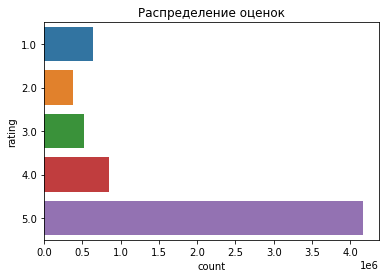

In [13]:
sns.countplot(data=df_rating, y='rating').set_title('Распределение оценок');

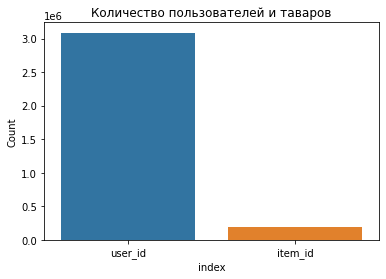

In [14]:
sns.barplot(
    data=df_rating[['user_id', 'item_id']].nunique().reset_index().rename({0:'Count'}, axis='columns'),
    x='index',
    y='Count'
).set_title('Количество пользователей и таваров');

## Построение модели

In [15]:
data = Dataset.load_from_df(df_rating[['user_id', 'item_id', 'rating']], reader=Reader())

In [16]:
model = SVD()

In [17]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2220  1.2225  1.2232  1.2226  0.0005  
MAE (testset)     0.9301  0.9307  0.9308  0.9305  0.0003  
Fit time          385.06  395.28  388.96  389.77  4.21    
Test time         35.95   31.77   31.59   33.10   2.01    


{'test_rmse': array([1.22198319, 1.22248195, 1.22319595]),
 'test_mae': array([0.93011451, 0.93071382, 0.93081427]),
 'fit_time': (385.0560760498047, 395.2848026752472, 388.95543098449707),
 'test_time': (35.9463415145874, 31.76976728439331, 31.59103274345398)}

In [23]:
def get_df_predict(model, uids, iids, count=2):
  predicts = []
  for uid in uids:
    user_predict = []
    for iid in iids:
      predict = model.predict(uid=uid, iid=iid)
      user_predict.append({'reviewerID': uid, 'item_id': iid, 'rating': predict.est})
    predicts += sorted(user_predict, key=lambda i: i['rating'], reverse=True)[:count]
  return pd.DataFrame(predicts)

In [24]:
# отберем 5 случайных пользователей для предсказаний
items = df_rating.item_id.unique()
users = np.random.choice(df_rating.user_id.unique(), 5, replace=True)

In [25]:
# получим предсказания по пользователям
df_predict = get_df_predict(model, users, items)

In [26]:
df_predict

,reviewerID,item_id,rating
0,A14GA3CNT467DA,1417084871,5.000000
1,A14GA3CNT467DA,B0002ARTVQ,5.000000
2,A1X593LQJGZK8B,B00E1HWMZ4,4.926577
3,A1X593LQJGZK8B,B01A6JSXIU,4.921457
4,A37KB7MEVY7N6U,6162622851,5.000000
5,A37KB7MEVY7N6U,B000084E6D,5.000000
6,A2FF9QBEFGAZGU,B0009VY71I,5.000000
7,A2FF9QBEFGAZGU,B000GEZCJ4,5.000000
8,AIETW7C51FVNL,B000255P5I,5.000000
9,AIETW7C51FVNL,B000256DS6,5.000000
